## Importando Bibliotecas

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Carregando  o dataset

In [9]:
data = pd.read_csv("data/teste_indicium_precificacao.csv")
data.head(10)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
5,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
7,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
8,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188
9,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6


In [10]:
data.shape

(48894, 16)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

### Limpeza de dados


In [12]:
data.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

Colunas "nome" e "host_name"

Elas não impactam diretamente o preço do aluguel.
Podemos remover os valores ausentes ou preenchê-los com um valor genérico, como "Desconhecido".
Colunas "ultima_review" e "reviews_por_mes"

Alta correlação: Se a listagem nunca teve reviews, a data da última avaliação e o número de reviews por mês estarão vazios.
Estratégia:
"ultima_review": Podemos deixar como nulo ou preenchê-la com um valor fictício, como "Nunca avaliado".
"reviews_por_mes": Substituir os valores ausentes por 0, assumindo que a listagem nunca foi avaliada.

In [ ]:

data["nome"].fillna("Desconhecido", inplace=True)
data["host_name"].fillna("Desconhecido", inplace=True)

data["reviews_por_mes"].fillna(0, inplace=True)
data["ultima_review"].fillna("Nunca avaliado", inplace=True)

print(data.isnull().sum())

'''''
 Remover outliers de preço (considerando valores acima do percentil 99)
price_threshold = np.percentile(df["price"], 99)
df = df[df["price"] <= price_threshold]

Remover valores mínimos de noite excessivos (considerando valores acima do percentil 99)
min_nights_threshold = np.percentile(df["minimo_noites"], 99)
df = df[df["minimo_noites"] <= min_nights_threshold]

Substituir valores nulos em 'reviews_por_mes' por 0 (assumindo que a listagem nunca recebeu avaliações)
df["reviews_por_mes"].fillna(0, inplace=True)

Exibir novas estatísticas após a limpeza
print("\nNovas estatísticas após limpeza:\n", df["price"].describe(), df["minimo_noites"].describe())
'''''

id                               0
nome                             0
host_id                          0
host_name                        0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
ultima_review                    0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64


### Exploratory Data Analysis (EDA)

In [14]:
print(data['bairro_group'].value_counts())


Manhattan        21661
Brooklyn         20103
Queens            5666
Bronx             1091
Staten Island      373
Name: bairro_group, dtype: int64


In [15]:
print(data['room_type'].value_counts())

Entire home/apt    25409
Private room       22325
Shared room         1160
Name: room_type, dtype: int64


In [16]:
print(data['room_type'].value_counts())

Entire home/apt    25409
Private room       22325
Shared room         1160
Name: room_type, dtype: int64


In [17]:

price_mean = data["price"].mean()
price_std = data["price"].std()
price_min = data["price"].min()
price_max = data["price"].max()
print(f"\nO preço médio é ${price_mean:.2f}, com desvio padrão de ${price_std:.2f}.")
print(f"O preço mínimo é ${price_min}, e o preço máximo é ${price_max}.")


O preço médio é $152.72, com desvio padrão de $240.16.
O preço mínimo é $0, e o preço máximo é $10000.


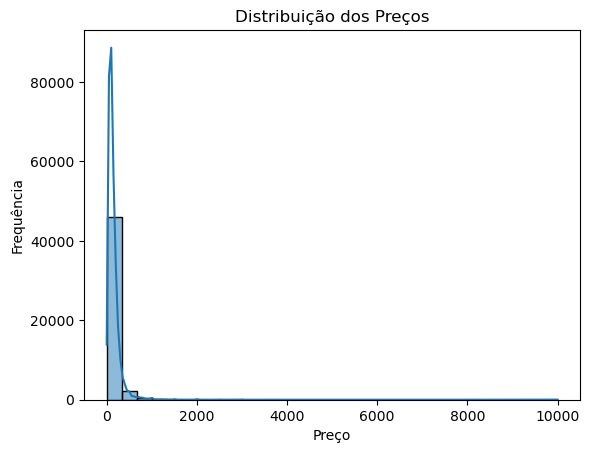

In [18]:
# Histograma dos preços
sns.histplot(data['price'], kde=True, bins=30)
plt.title('Distribuição dos Preços')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()


O histograma dos preços apresenta uma distribuição assimétrica à direita, indicando a presença de valores altos que podem influenciar a média. A maior concentração de preços está na faixa mais baixa, com poucos valores extremos. Essa assimetria sugere que pode ser útil aplicar uma transformação logarítmica para melhor visualização e modelagem.

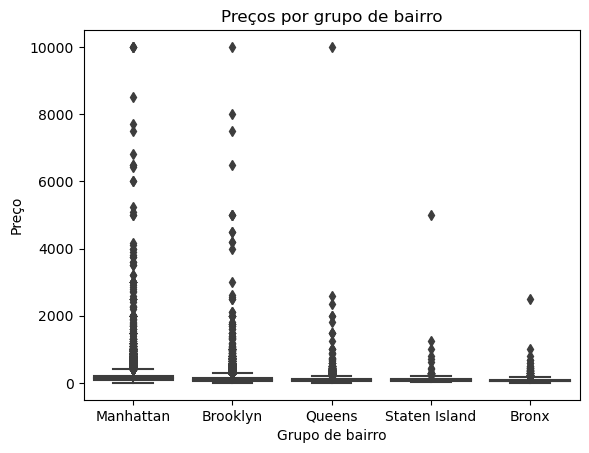

In [19]:
sns.boxplot(x='bairro_group', y='price', data=data)
plt.title('Preços por grupo de bairro')
plt.xlabel('Grupo de bairro')
plt.ylabel('Preço')
plt.show()


Os boxplots revelam diferenças significativas nos preços entre os bairros. Algumas regiões possuem uma dispersão maior, sugerindo uma variabilidade maior nos preços das acomodações. Além disso, há a presença de outliers em todas as regiões, o que indica a existência de propriedades com preços muito acima da média do bairro.

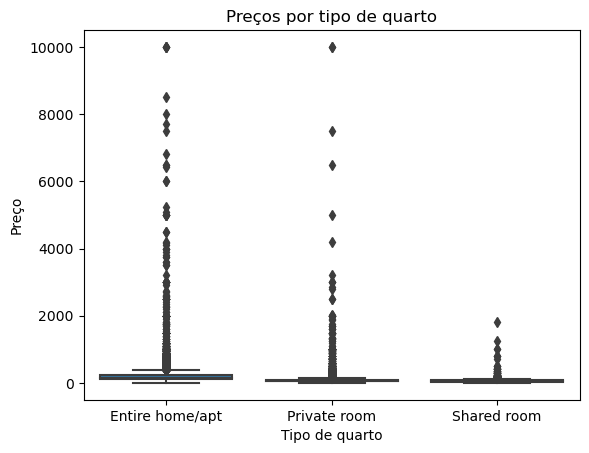

In [20]:
sns.boxplot(x='room_type', y='price', data=data)
plt.title('Preços por tipo de quarto')
plt.xlabel('Tipo de quarto')
plt.ylabel('Preço')
plt.show()


O gráfico mostra que quartos inteiros têm preços medianos mais elevados em comparação com quartos compartilhados ou individuais. A dispersão dos preços dentro de cada categoria é notável, com a categoria de 'Entire home/apt' apresentando a maior variabilidade e mais outliers. Isso indica que a precificação dentro dessa categoria pode ser muito heterogênea.

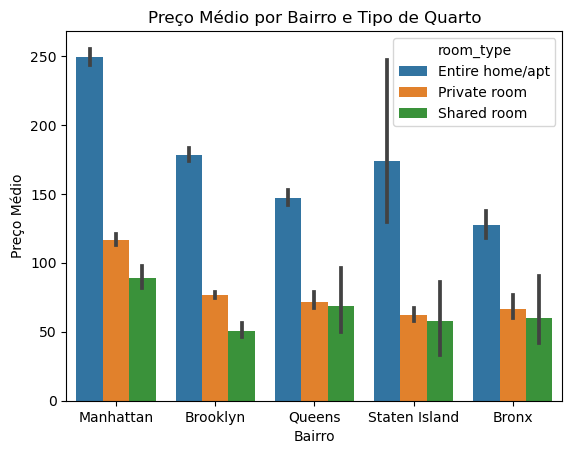

In [21]:
# Preço médio por bairro e tipo de quarto
sns.barplot(x='bairro_group', y='price', hue='room_type', data=data, estimator=np.mean)
plt.title('Preço Médio por Bairro e Tipo de Quarto')
plt.xlabel('Bairro')
plt.ylabel('Preço Médio')
plt.show()

O gráfico confirma que a localização e o tipo de acomodação influenciam fortemente o preço. Algumas combinações de bairro e tipo de quarto apresentam preços médios bem distintos, o que pode indicar padrões específicos de oferta e demanda. Essa informação pode ser útil para previsões de preços e segmentação de mercado.

In [27]:
min_nights_mean = data["minimo_noites"].mean()
min_nights_max = data["minimo_noites"].max()
print(f"\nA média de noites mínimas é {min_nights_mean:.2f}, com um valor máximo de {min_nights_max} noites.")


A média de noites mínimas é 7.03, com um valor máximo de 1250 noites.


In [29]:
reviews_max = data["numero_de_reviews"].max()
print(f"\nO máximo de reviews para um anúncio é {reviews_max}.")


O máximo de reviews para um anúncio é 629.


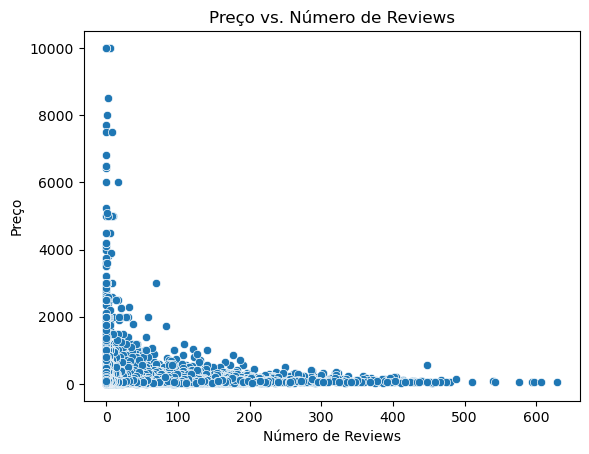

In [22]:
sns.scatterplot(x='numero_de_reviews', y='price', data=data)
plt.title('Preço vs. Número de Reviews')
plt.xlabel('Número de Reviews')
plt.ylabel('Preço')
plt.show()


O scatterplot mostra que não há uma relação clara entre o número de avaliações e o preço. A maioria das acomodações com preços mais baixos tendem a ter mais avaliações, enquanto as opções mais caras possuem menos reviews. Isso pode indicar que hospedagens mais acessíveis atraem um público maior e mais propenso a avaliar a experiência.

## Correlação entre Preço e Minímo de noites e Disponibilidade ao longo do ano 

In [23]:

correlacao_linear = data.corr()
correlacao_price = correlacao_linear['price'].sort_values(ascending=False)
print(correlacao_price)

price                            1.000000
disponibilidade_365              0.081833
calculado_host_listings_count    0.057472
minimo_noites                    0.042799
latitude                         0.033939
host_id                          0.015309
id                               0.010618
numero_de_reviews               -0.047954
reviews_por_mes                 -0.050564
longitude                       -0.150020
Name: price, dtype: float64


/tmp/ipykernel_5585/1631188379.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao_linear = data.corr()


In [24]:
correlacao_spearman = data.corr(method='spearman')
c = correlacao_spearman['price'].sort_values(ascending=False)
print(c)

price                            1.000000
latitude                         0.136191
minimo_noites                    0.101304
disponibilidade_365              0.086072
id                              -0.020723
numero_de_reviews               -0.055012
reviews_por_mes                 -0.059985
host_id                         -0.071757
calculado_host_listings_count   -0.106108
longitude                       -0.438031
Name: price, dtype: float64


/tmp/ipykernel_5585/3982092327.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao_spearman = data.corr(method='spearman')


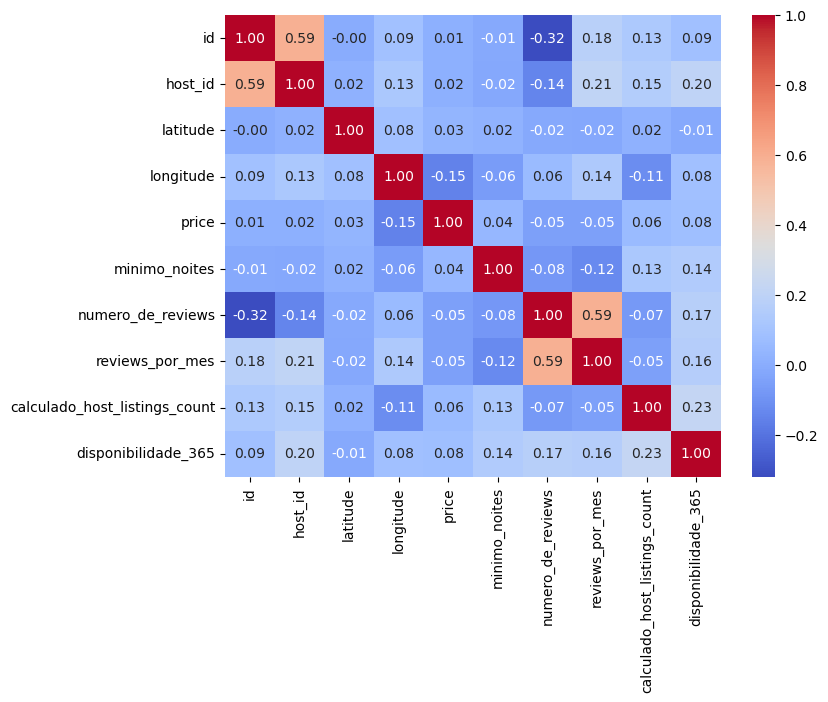

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao_linear, annot=True, cmap='coolwarm', fmt='.2f')  # 2 casas decimais
plt.show()


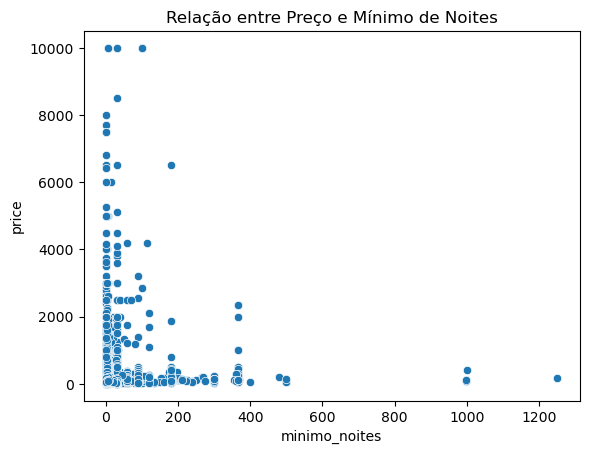

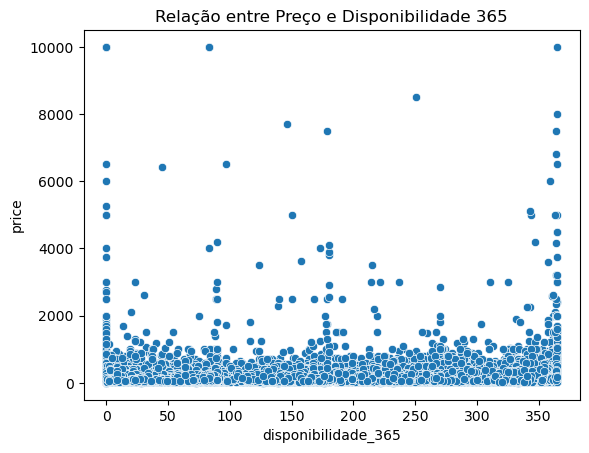

In [26]:
# Gráfico de dispersão entre preço e minimo_noites
sns.scatterplot(x=data['minimo_noites'], y=data['price'])
plt.title('Relação entre Preço e Mínimo de Noites')
plt.show()

# Gráfico de dispersão entre preço e disponibilidade_365
sns.scatterplot(x=data['disponibilidade_365'], y=data['price'])
plt.title('Relação entre Preço e Disponibilidade 365')
plt.show()